# Лабораторная работа: Интерполяция рациональными функциями Беррута




## Необходимо реалиозовать метод Беррута

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import BarycentricInterpolator

def berrut_interpolator(x_nodes, y_nodes, x_eval):
    """
    Интерполяция рациональной функцией Беррута.
    Веса w_k = (-1)^k
    """
    n = len(x_nodes)
    w = np.array([(-1)**k for k in range(n)])
    
    numerator = np.zeros_like(x_eval, dtype=float)
    denominator = np.zeros_like(x_eval, dtype=float)

    for i in range(n):
        diff = x_eval - x_nodes[i]

        with np.errstate(divide='ignore', invalid='ignore'):
            term = w[i] / diff
            term = np.nan_to_num(term, nan=0.0)
            
        numerator += term * y_nodes[i]
        denominator += term

    y_eval = numerator / denominator
    
    for i, x_node in enumerate(x_nodes):
        mask = np.isclose(x_eval, x_node)
        y_eval[mask] = y_nodes[i]
        
    return y_eval

def lagrange_interpolator(x_nodes, y_nodes, x_eval):
    poly = BarycentricInterpolator(x_nodes, y_nodes)
    return poly(x_eval)

## 1: Феномен Рунге
Провести сравнительный анализ интерполяции функции Рунге методами Беррута и полинома Лагранжа. Построить графики интерполяционных приближений и исходной функции, сравнить поведение методов, а также сделать выводы о качестве аппроксимации.

Необходимо:

1. Построить интерполяционные полиномы Лагранжа и Беррута для функции Рунге на выбранных узлах.

2. Визуализировать оригинальную функцию и интерполяционные результаты обоих методов.


3. Сделать выводы о преимуществах и недостатках каждого метода на данной задаче.

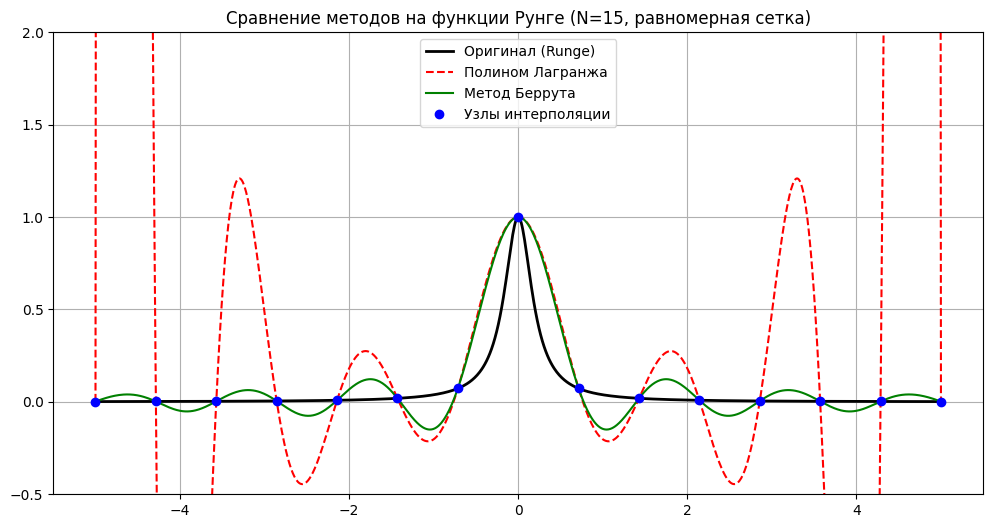

ВЫВОДЫ:
1. Полином Лагранжа демонстрирует сильные осцилляции на краях интервала (феномен Рунге).
2. Рациональная интерполяция Беррута на тех же равномерных узлах ведет себя значительно стабильнее и не имеет таких выбросов.


In [2]:
def runge_func(x):
    return 1.0 / (1.0 + 25 * x**2)

x_min, x_max = -5, 5

N_nodes = 15
x_nodes = np.linspace(x_min, x_max, N_nodes)
y_nodes = runge_func(x_nodes)

x_plot = np.linspace(x_min, x_max, 1000)
y_true = runge_func(x_plot)

y_lagrange = lagrange_interpolator(x_nodes, y_nodes, x_plot)
y_berrut = berrut_interpolator(x_nodes, y_nodes, x_plot)

plt.figure(figsize=(12, 6))
plt.plot(x_plot, y_true, 'k-', linewidth=2, label='Оригинал (Runge)')
plt.plot(x_plot, y_lagrange, 'r--', label='Полином Лагранжа')
plt.plot(x_plot, y_berrut, 'g-', label='Метод Беррута')
plt.plot(x_nodes, y_nodes, 'bo', label='Узлы интерполяции')

plt.title(f'Сравнение методов на функции Рунге (N={N_nodes}, равномерная сетка)')
plt.ylim(-0.5, 2.0)
plt.legend()
plt.grid(True)
plt.show()

print("ВЫВОДЫ:")
print("1. Полином Лагранжа демонстрирует сильные осцилляции на краях интервала (феномен Рунге).")
print("2. Рациональная интерполяция Беррута на тех же равномерных узлах ведет себя значительно стабильнее и не имеет таких выбросов.")

## 2: Анализ ошибок
Для полученных интерполяционных результатов (Беррута и Лагранжа) на функции Рунге вычислить следующие показатели точности:

1. Средняя абсолютная ошибка (Mean Absolute Error, MAE)

2. Максимальная абсолютная ошибка

3. Среднеквадратичная ошибка (Root Mean Squared Error, RMSE)

In [3]:
def calculate_errors(y_true, y_pred, method_name):
    mae = np.mean(np.abs(y_true - y_pred))
    max_error = np.max(np.abs(y_true - y_pred))
    rmse = np.sqrt(np.mean((y_true - y_pred)**2))
    
    print(f"--- Ошибки для метода: {method_name} ---")
    print(f"MAE (Средняя абсолютная): {mae:.6f}")
    print(f"Max Error (Максимальная): {max_error:.6f}")
    print(f"RMSE (Среднеквадратичная): {rmse:.6f}")
    print("")

calculate_errors(y_true, y_lagrange, "Лагранж")
calculate_errors(y_true, y_berrut, "Беррут")

--- Ошибки для метода: Лагранж ---
MAE (Средняя абсолютная): 4.466202
Max Error (Максимальная): 47.589096
RMSE (Среднеквадратичная): 11.730341

--- Ошибки для метода: Беррут ---
MAE (Средняя абсолютная): 0.084820
Max Error (Максимальная): 0.446631
RMSE (Среднеквадратичная): 0.130123



## 3: Тестирование интерполяционных методов на различных функциях
Провести сравнительный анализ методов интерполяции Лагранжа и Беррута на нескольких тестовых функциях. Для каждого метода построить интерполяционные полиномы, визуализировать результаты и оценить качество аппроксимации.
Рекомендуемые функции для тестирования:
### Список функций для тестирования

- **Функция 1:**  
  $$ f_1(x) = \sin(x), \quad x \in [-\pi, \pi] $$

- **Функция 2:**  
  $$ f_2(x) = e^x, \quad x \in [-2, 2] $$

- **Функция 3:**  
  $$ f_3(x) = x^2 \sin(x), \quad x \in [-5, 5] $$

- **Функция 4:**  
  $$ f_4(x) = |x|, \quad x \in [-3, 3] $$

- **Функция 5:**  
  $$ f_5(x) = \sin(10x) e^{-x^2}, \quad x \in [-3, 3] $$


Необходимо выполнить
1. Провести интерполяцию для каждой функции на равномерной и неравномерной сетке узлов.

2. Построить графики исходных функций и интерполяционных полиномов для обоих методов.

3. Сравнить визуально и численно (по погрешности) результаты для методов Лагранжа и Беррута.



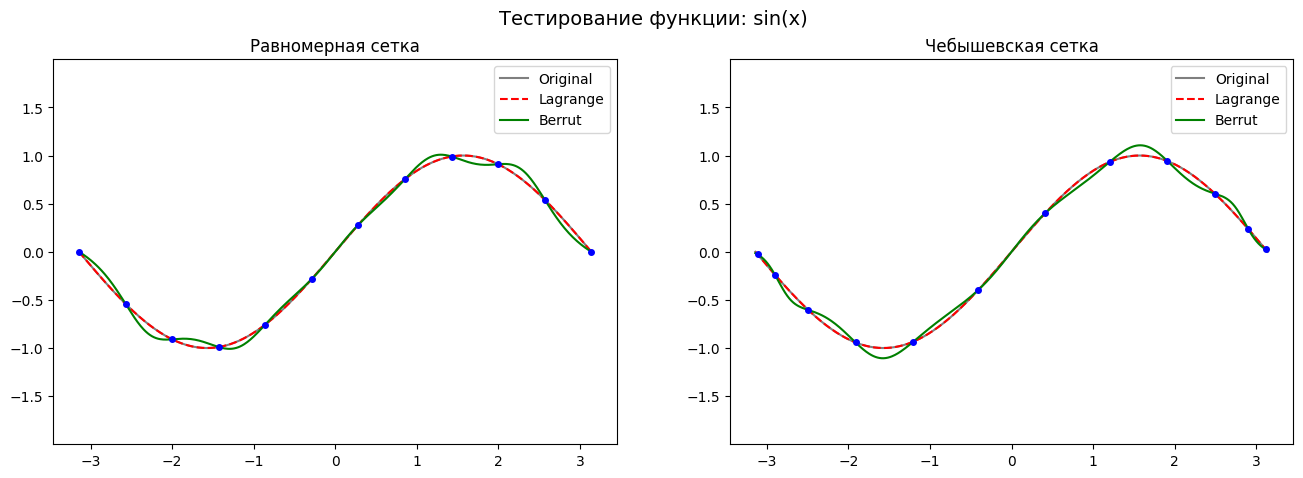

/tmp/ipykernel_52549/1460416880.py:23: RuntimeWarning: overflow encountered in multiply
  numerator += term * y_nodes[i]


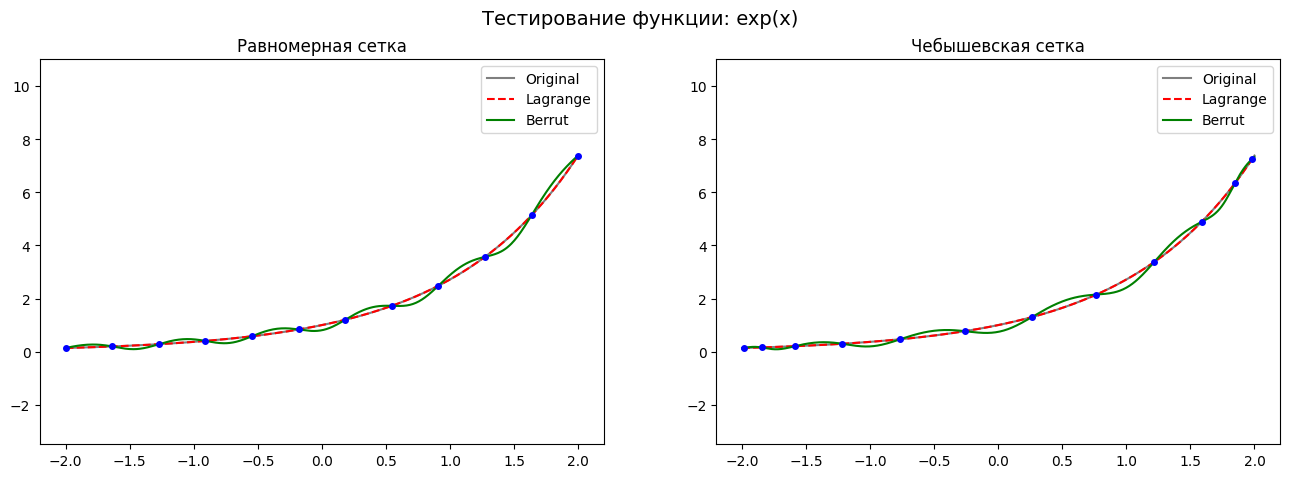

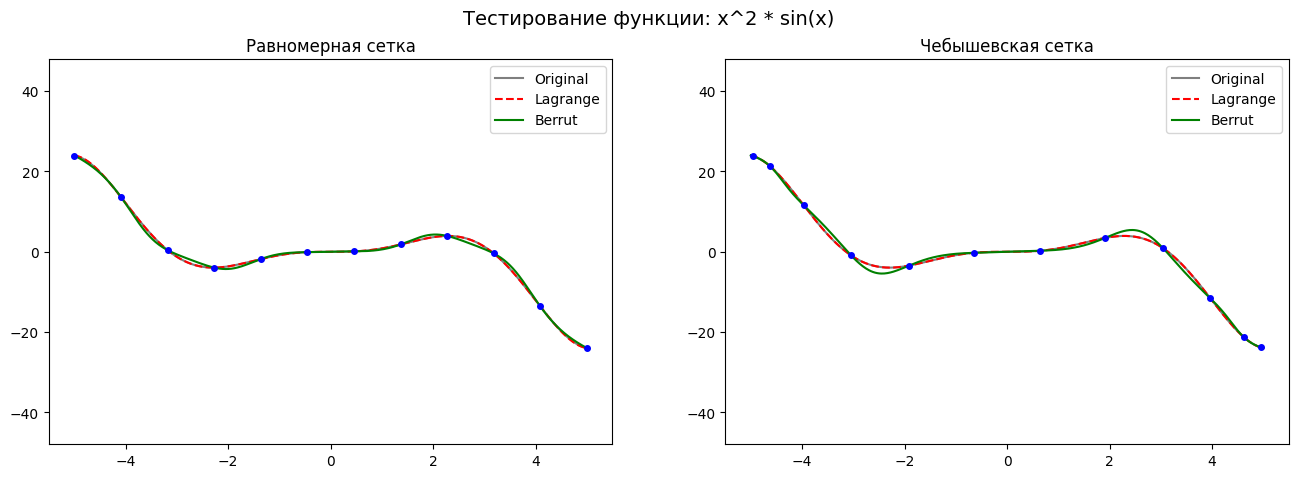

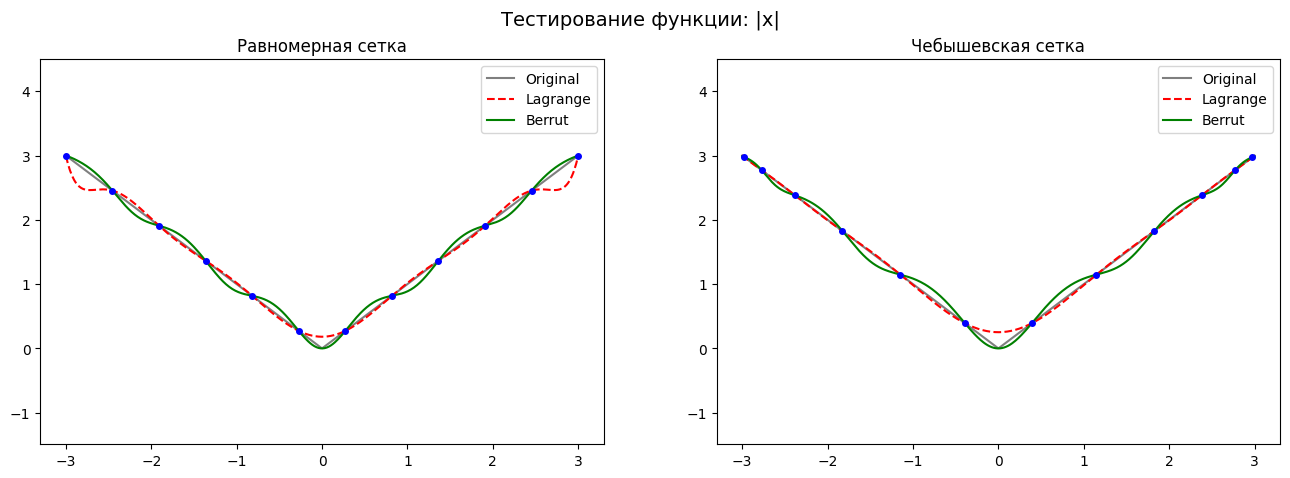

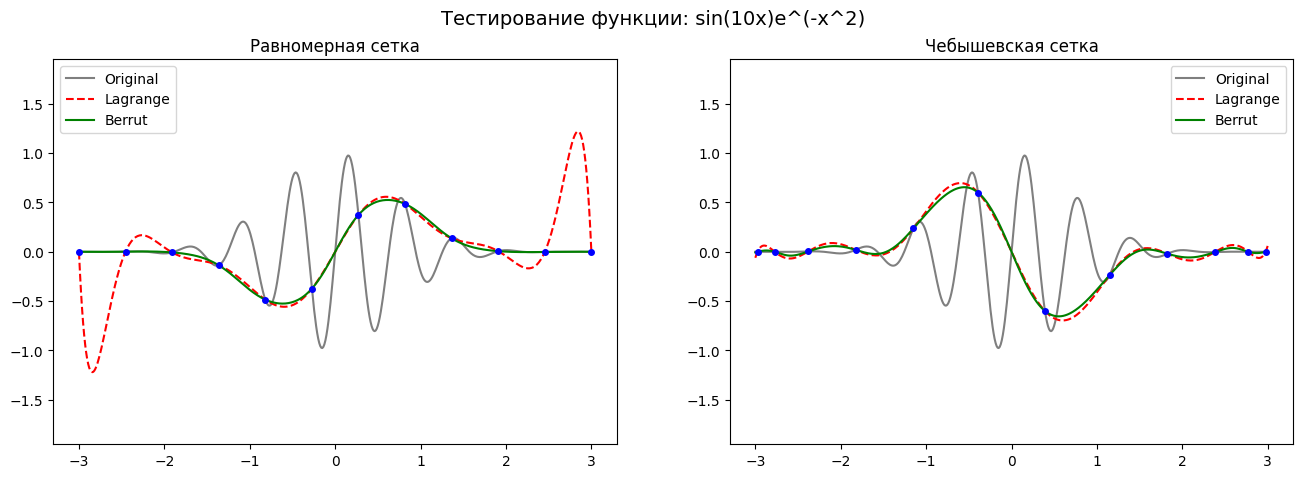

In [4]:
functions = [
    {"func": lambda x: np.sin(x), "range": (-np.pi, np.pi), "name": "sin(x)"},
    {"func": lambda x: np.exp(x), "range": (-2, 2), "name": "exp(x)"},
    {"func": lambda x: (x**2) * np.sin(x), "range": (-5, 5), "name": "x^2 * sin(x)"},
    {"func": lambda x: np.abs(x), "range": (-3, 3), "name": "|x|"},
    {"func": lambda x: np.sin(10*x) * np.exp(-x**2), "range": (-3, 3), "name": "sin(10x)e^(-x^2)"}
]

def get_chebyshev_nodes(a, b, n):
    k = np.arange(n)
    x = np.cos((2*k + 1) / (2*n) * np.pi)
    return 0.5 * (a + b) + 0.5 * (b - a) * x

N_test = 12

for item in functions:
    f = item["func"]
    a, b = item["range"]
    name = item["name"]
    
    x_fine = np.linspace(a, b, 500)
    y_fine = f(x_fine)
    
    fig, axes = plt.subplots(1, 2, figsize=(16, 5))
    fig.suptitle(f"Тестирование функции: {name}", fontsize=14)
    
    x_uni = np.linspace(a, b, N_test)
    y_uni = f(x_uni)
    
    y_lag_uni = lagrange_interpolator(x_uni, y_uni, x_fine)
    y_ber_uni = berrut_interpolator(x_uni, y_uni, x_fine)
    
    axes[0].plot(x_fine, y_fine, 'k-', alpha=0.5, label='Original')
    axes[0].plot(x_fine, y_lag_uni, 'r--', label='Lagrange')
    axes[0].plot(x_fine, y_ber_uni, 'g-', label='Berrut')
    axes[0].plot(x_uni, y_uni, 'bo', markersize=4)
    axes[0].set_title("Равномерная сетка")
    axes[0].legend()
    y_range = np.max(y_fine) - np.min(y_fine)
    axes[0].set_ylim(np.min(y_fine) - y_range*0.5, np.max(y_fine) + y_range*0.5)

    x_cheb = get_chebyshev_nodes(a, b, N_test)
    y_cheb = f(x_cheb)
    
    y_lag_cheb = lagrange_interpolator(x_cheb, y_cheb, x_fine)
    y_ber_cheb = berrut_interpolator(x_cheb, y_cheb, x_fine)
    
    axes[1].plot(x_fine, y_fine, 'k-', alpha=0.5, label='Original')
    axes[1].plot(x_fine, y_lag_cheb, 'r--', label='Lagrange')
    axes[1].plot(x_fine, y_ber_cheb, 'g-', label='Berrut')
    axes[1].plot(x_cheb, y_cheb, 'bo', markersize=4)
    axes[1].set_title("Чебышевская сетка")
    axes[1].legend()
    axes[1].set_ylim(np.min(y_fine) - y_range*0.5, np.max(y_fine) + y_range*0.5)
    
    plt.show()

## 4: Интерполяция зашумленных данных
Провести сравнительный анализ методов интерполяции Лагранжа и Беррута на зашумленных данных. Необходимо построить графики, включающие:

1. График интерполяции, на котором изображены оригинальная функция, зашумленные точки и результаты интерполяции двумя методами.

2. График сравнения ошибок интерполяции каждого метода.

Варианты:
* Вариант 1: равномерные узлы, низкий гауссов шум

* Вариант 2: равномерные узлы, высокий гауссов шум



Ваш вариант: номер по списку % 2

Выбран вариант: Равномерные узлы, низкий шум (Шум: 0.05)


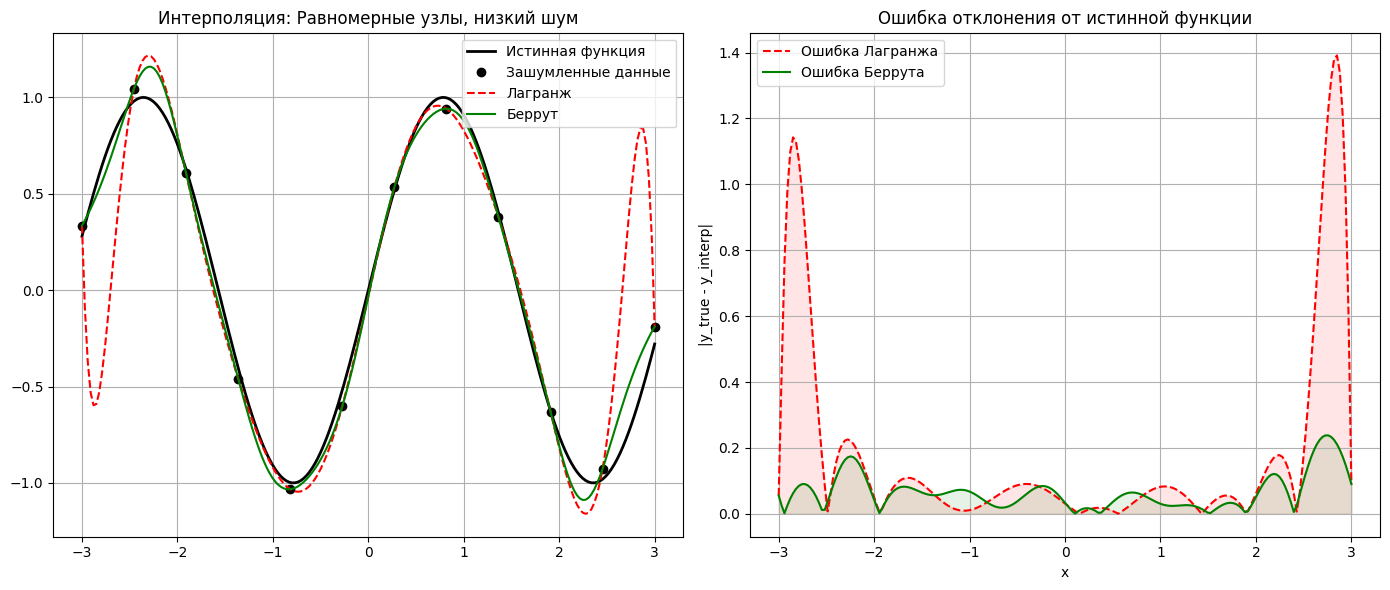

RMSE (Лагранж): 0.36693
RMSE (Беррут):  0.08366


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return np.sin(2*x)

def generate_data(nodes, noise_level, noise_type='gaussian'):
    y_true = f(nodes)
    if noise_type == 'gaussian':
        noise = np.random.normal(0, noise_level, size=nodes.shape)
    y_noisy = y_true + noise
    return y_true, y_noisy

uniform_nodes = np.linspace(-3, 3, 12)

variants = [
    (uniform_nodes, 0.05, 'gaussian', 'Равномерные узлы, низкий шум'),
    (uniform_nodes, 0.2, 'gaussian', 'Равномерные узлы, высокий шум')
]

variant_idx = 0 
nodes_in, noise_level_in, noise_type_in, desc_in = variants[variant_idx]

print(f"Выбран вариант: {desc_in} (Шум: {noise_level_in})")

y_true_nodes, y_noisy_nodes = generate_data(nodes_in, noise_level_in, noise_type_in)

x_plot = np.linspace(np.min(nodes_in), np.max(nodes_in), 200)
y_plot_true = f(x_plot)

y_lagrange_noisy = lagrange_interpolator(nodes_in, y_noisy_nodes, x_plot)
y_berrut_noisy = berrut_interpolator(nodes_in, y_noisy_nodes, x_plot)

plt.figure(figsize=(14, 6))

# График 1: Визуализация
plt.subplot(1, 2, 1)
plt.plot(x_plot, y_plot_true, 'k-', linewidth=2, label='Истинная функция')
plt.plot(nodes_in, y_noisy_nodes, 'ko', label='Зашумленные данные')
plt.plot(x_plot, y_lagrange_noisy, 'r--', label='Лагранж')
plt.plot(x_plot, y_berrut_noisy, 'g-', label='Беррут')
plt.title(f"Интерполяция: {desc_in}")
plt.legend()
plt.grid(True)

# График 2: Ошибки
error_lagrange = np.abs(y_plot_true - y_lagrange_noisy)
error_berrut = np.abs(y_plot_true - y_berrut_noisy)

plt.subplot(1, 2, 2)
plt.plot(x_plot, error_lagrange, 'r--', label='Ошибка Лагранжа')
plt.plot(x_plot, error_berrut, 'g-', label='Ошибка Беррута')
plt.fill_between(x_plot, error_lagrange, color='red', alpha=0.1)
plt.fill_between(x_plot, error_berrut, color='green', alpha=0.1)
plt.title("Ошибка отклонения от истинной функции")
plt.xlabel("x")
plt.ylabel("|y_true - y_interp|")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

rmse_lag = np.sqrt(np.mean((y_plot_true - y_lagrange_noisy)**2))
rmse_ber = np.sqrt(np.mean((y_plot_true - y_berrut_noisy)**2))

print(f"RMSE (Лагранж): {rmse_lag:.5f}")
print(f"RMSE (Беррут):  {rmse_ber:.5f}")